# Aplicación de las series de Taylor.

**Objetivos.**
Utilizar las series de Taylor para aproximar una función que proporciona la temperatura en una barra de metal.
  
**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019, PE101922 y PE106025.**

[![License: CC BY-SA 4.0](https://img.shields.io/badge/License-CC_BY--SA_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by-sa/4.0/)


## Transferencia de calor

En invierno buscamos nuestra comodidad térmica aislando nuestros cuerpos al cubrirlos con gruesos abrigos, de este modo minimizamos el área superficial expuesta a temperaturas bajas. Pero en verano, intentamos minimizar la ganancia de calor por radiación al permanecer en lugares sombreados. De igual manera, si usamos una cuchara de metal para mover nuestros alimentos mientras los calentamos en la estufa, sentiremos la cuchara caliente después de unos minutos, y si no tenemos cuidado podemos quemarnos la mano debido a que los metales son buenos transmisores del calor. Lo que estamos describiendo con estos ejemplos son casos cotidianos de la **transferencia de calor**. 

En el siguiente video, observamos como una barra de metal es expuesta a una fuente de calor en su extremo izquierdo y se representa con colores el aumento de la temperatura en toda la barra:

<table>
  <tr>
    <td><video src="./z01_Conduccion1D.mp4" width="320" controls></video></td>
    <td><video src="./z02_Conduccion1D.mp4" width="320" controls></video></td>
  </tr>
</table>

**¿Será posible usar las Series de Taylor, para estudiar como se transfiere el calor en diferentes circunstancias?**

## Modelo matemático
Un modelo matemático que describe la conducción de calor es el siguiente:

$\displaystyle
\nabla \cdot \left( \kappa \nabla T \right) = -q
$

donde $\kappa$ representa la conductividad térmica y $q$ una fuente de energía calorífica.

Si quisieramos determinar la distribución de temperaturas en una barra de metal, con $\kappa$ = cte., usaríamos un modelo en una dimensión que se puede escribir como sigue:

$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = -q
$

La barra tiene una temperatura $T_A$ en su extremo izquierdo y otra temperatura $T_B$ en su extremo derecho y además consideramos que $q$ = cte.

En este caso particular, la solución se puede obtener de manera analítica, de tal manera que es posible encontrar una función $T(x)$ que proporcione la temperatura en cada posición $x$. También es posible aproximar la solución mediante técnicas numéricas. Veremos ambos casos a continuación, en los cuales se hace uso de las Series de Taylor.

## Solución analítica
Es posible obtener una función $T(x)$ que describa la distribución de temperaturas a lo largo de dicha barra. Para ello vamos a escribir $T(x)$ en forma de una serie Taylor

$
\displaystyle
T_n(x) = \sum_{i=0}^n T^{(i)}(a)\frac{(x-a)^i}{i!} = \sum_{i=0}^n c_i (x-a)^i
$

donde $\displaystyle c_i = \frac{T^{(i)}(a)}{i!}$.

Definimos ahora una aproximación alrededor de $a = 0$ para $n = 2$ con lo que obtenemos:


$\displaystyle
T(x) = c_0 + c_1 *x + c_2 * x^2
$

Calculamos la primera y segunda derivadas de $T(x)$:

$
\begin{eqnarray}
\frac{d T(x)}{d x} & = & c_1 + 2 * c_2 * x \\
\frac{d^2 T(x)}{d x^2} & = & 2 * c_2 \\
\end{eqnarray}
$

Sustituyendo esta segunda derivada en la ecuación de conducción de calor obtenemos:

$
\displaystyle
\kappa (2 * c_2 ) = -q \Longrightarrow \boxed{c_2 = -\frac{q}{2 \kappa}}
$

Para obtener $c_0$ y $c_1$ hacemos uso de las condiciones de frontera en $T(x)$:

$\displaystyle
\begin{eqnarray}
\text{Extremo izquierdo: } T(x=0) & = & c_0 + c_1 * 0 + c_2 * 0^2 = T_A  \\
&\Longrightarrow& \boxed{c_0 = T_A} \\
\text{Extremo derecho: } T(x=L) & = & c_0 + c_1 * L + c_2 * L^2 = T_A + c_1 * L - \frac{q}{2 \kappa} * L^2 =
T_B \\
&\Longrightarrow& \boxed{c_1 = \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L}}
\end{eqnarray}
$

De esta manera tenemos que la solución final es:

$\displaystyle
T(x) = T_A + \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L} x - \frac{q}{2 \kappa} x^2 =
\boxed{\left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A}
$

Implementamos esta solución en una función de Python:

In [1]:
def temperatura(x, TA, TB, q, L, k):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.
    """
    return ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA

<div class="alert alert-success">

### Ejemplo 1.

Este ejemplo representa una barra aislada con temperaturas $T_A$ y $T_B$ en sus extremos. 

Datos del problema:
- $\kappa = 1000$ [W /m $^o$C]
- $L = 0.5$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 500$ [$^o$C]
- $q = 0$

</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import macti.vis as mvis

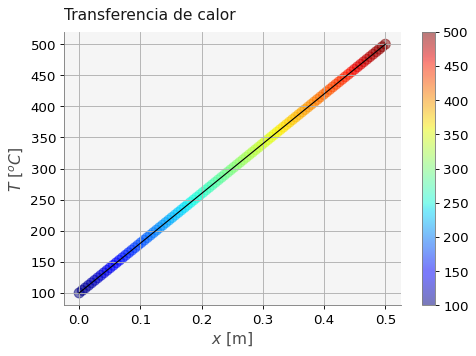

In [4]:
# Datos físicos
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Calculamos la temperatura con la solución analítica en 100 puntos
x = np.linspace(0, L, 100)
T = temperatura(x, TA, TB, q, L, k)

# Definición del espacio de graficación
ejes_par = dict(title='Transferencia de calor', xlabel='$x$ [m]', ylabel='$T$ [$^oC$]')
v = mvis.Plotter(1,1,[ejes_par])

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
v.plot(1, x, T, color='k', lw =1.0)
s = v.scatter(1, x, T, c=T, cmap='jet', s=80, alpha=0.5)

# Configuración de la gráfica
v.colorbar(1, s) # Se muestra una barra de color 
v.grid()
v.show()

<div class="alert alert-success">

### Ejemplo 2.

Este ejemplo representa una barra que en cada uno de sus puntos recibe un flujo de calor $q$ y con temperaturas $T_A$ y $T_B$ en sus extremos. Véase [2].

Datos:
- $\kappa = 0.5$ [W /m $^o$C]
- $L = 0.02$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 200$ [$^o$C]
- $q = 10^6$ [W/m$^3$]

</div>

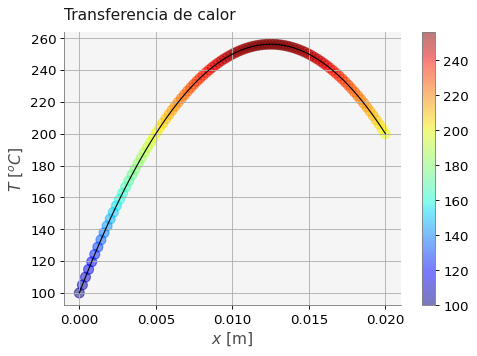

In [5]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6

# Calculamos la temperatura con la solución analítica
x = np.linspace(0,L,100)
T = temperatura(x, TA, TB, q, L, k)

# Definición del espacio de graficación
v = mvis.Plotter(1,1,[ejes_par])

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
v.plot(1, x, T, color='k', lw=1.0)
s = v.scatter(1, x, T, c=T, cmap='jet', s=80, alpha=0.5)
v.colorbar(1, s) # Se muestra una barra de color 
v.grid()
v.show()

## Solución numérica
Los ejemplos anteriores también se pueden resolver usando el método numérico conocido como diferencias finitas, el cual se obtiene también usando Series de Taylor. Veamos como:

### Derivadas de primer orden
Supongamos que $u(x)$ es una función bien comportada con $n$ derivadas continuas.
Entonces podemos escribir la siguiente serie de Taylor alrededor de $x_0$:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)$ 

donde $h = x-x_0$, despejando de aquí $x$ se obtiene $x = x_0 + h$. Si truncamos el polinomio de Taylor a primer orden tenemos:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + R_1(x)$ 

Luego despejamos $u^\prime(x_0)$:

$\displaystyle
\begin{eqnarray}
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{R_1(x)}{h} \\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{\prime\prime}(\xi) h^2 / 2!}{h} \\ 
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{\prime\prime}(\xi)}{2} h\\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \mathcal{O}(h) \tag{1}\\
\end{eqnarray}
$

**Observaciones**:
1. La expresión $\mathcal{O}(h)$ en la ecuación $(1)$ significa que el último término es de orden $h$.

2. Cuando $h$ es muy pequeña podemos escribir la ecuación $(1)$ como sigue:

$\displaystyle
u^\prime(x_0) = \lim_{h \rightarrow 0 } \frac{u(x_0+h) - u(x_0)}{h}
$

Esta es la definición para la derivada que se ve en los libros de cálculo.

3. Si eliminamos el término $\mathcal{O}(h)$ de la ecuación $(1)$ tendremos una aproximación de la derivada, cuyo orden de aproximación es $h$:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0+h) - u(x_0)}{h}
$

A esta aproximación se le conoce como **Diferencias Finitas hacia Adelante**.

<div class="alert alert-success">

### Ejercicio
Mostrar que la aproximación de la derivada hacia atrás de orden $h$ se escribe como:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0) - u(x_0-h)}{h}
$

**Hint**: Escriba la expansión en series de Taylor de $u(x_0-h)$ y despeje $u^\prime(x_0)$

</div>

### Derivadas de segundo orden

Las expansiones en series de Taylor de $u(x_0 + h)$ y de $u(x_0 - h)$ son: 

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

$\displaystyle
u(x_0-h) = u(x_0) - u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 - \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

Ahora sumamos a las dos ecuaciones para obtener:

$\displaystyle
u(x_0+h) + u(x_0-h) = 2u(x_0) + u^{\prime\prime}(x_0) h^2 + \frac{2 u^{(4)}(x_0)}{4!}h^4 + 
\frac{2 u^{(6)}(x_0)}{6!}h^6 + \dots + \mathcal{O}(h^{(n+1)})$ 

Observamos que todos los términos de orden impar se han eliminado, esto debido a que esta aproximación es simétrica y está centrada en $x_0$. Truncamos la serie hasta orden 4 y despejamos $u^{\prime\prime}(x_0)$ :

$$\displaystyle
u^{\prime\prime}(x_0) = \frac{u(x_0-h) - 2u(x_0) +  u(x_0+h)}{h^2} + \mathcal{O}(h^2) \tag{2}$$

Tenemos entonces una aproximación a la segunda derivada de orden $h^2$.

### Aproximación de la ecuación de calor
Usando la aproximación de la segunda derivada, ecuación $(2)$, se puede escribir la  ecuación de calor
$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = q
$
como sigue:

$$
\displaystyle
\begin{eqnarray}
\kappa \left( \frac{T(x_0-h) - 2T(x_0) +  T(x_0+h)}{h^2} \right) & = & q \\
\Longrightarrow T(x_0-h) - 2T(x_0) +  T(x_0+h) & = & \frac{q h^2}{\kappa}
\end{eqnarray}
$$

Lo que nos dice esta última ecuación es que se puede aproximar la temperatura en $x_0$ con un error de orden $\mathcal{O}(h^2)$. Entonces entre más pequeño sea el $h$ mejor es la aproximación. Para obtener una solución en toda la barra, se construye una ecuación como la anterior para cada punto de la barra donde se desea conocer la temperatura, véase el siguiente video:

<video src="./z03_Conduccion1D.mp4" width="320" controls></video>

Los puntos estarán equidistantes de tal manera que la distancia entre ellos, $h$, se puede disminuir agregando cada vez más puntos. Obsérvese también que hay dos puntos especiales en  los extremos de la barra, donde la temperatura es conocida (condiciones de frontera).
Si escribimos las ecuaciones para todos los puntos, digamos que tenemos $N$ puntos, entonces obtendremos un sistema lineal de ecuaciones como el siguiente:

$
\begin{eqnarray}
T_0 - 2T_1 + T_2  & = & -Q \\
T_1 - 2T_2 + T_3 & = & -Q \\
& \vdots & \\
T_{N-2} - 2T_{N-1} + T_N & = & -Q 
\end{eqnarray}
$

donde $\displaystyle Q = \frac{q h^2}{\kappa}$, $T_0 = T_A$ (temperatura en el extremo izquierdo) y $T_N = T_B$ (temperatura en el extremo derecho). 

Se puede escribir este sistemal en forma matricial :

$
\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & \dots & & & 0\\ 
 1 &-2 & 1 & 0 & \dots & &0\\ 
 0 & 1 &-2 & 1 & 0 &  & 0\\ 
 \vdots &\ddots&\ddots&\ddots&\ddots&\ddots&\vdots\\
0 & \dots & 0 & 1 &-2 & 1 & 0 \\
0 &  \dots && 0 & 1 &-2 & 1 \\
0 &  \dots &&& 0 & 1 &-2  \\
\end{array}\right)
\left(
\begin{array}{c}
T_1 \\ T_2 \\ T_3 \\ \vdots \\ T_{N-3} \\ T_{N-2} \\ T_{N-1}
\end{array}\right) = 
-\left(
\begin{array}{c}
Q + T_A \\ Q \\ Q \\ \vdots \\ Q \\ Q \\ Q + T_{B}
\end{array}\right)
$

Resolviendo el sistema obtendremos las temperaturas en todos los puntos y por lo tanto una aproximación a la solución. La siguiente función de Python genera el sistema lineal, lo resuelve y regresa la temperatura en los diferentes puntos de la barra:

In [6]:
def resuelve(TA, TB, q, L, k, N):
    h = L / (N-1)

    # Construcción del vector del lado derecho (RHS)
    Q = np.zeros(N)
    
    # Construcción de la matriz
    A = np.identity(N)
    for i in range(1,N-1):
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1
        Q[i] = -q * h**2 / k
    
    # Aplicación de las condiciones de frontera
    Q[1]  -= TA
    Q[-2] -= TB
    
    # Solución del sistema y regreso de la solución
    return np.linalg.solve(A[1:-1,1:-1], Q[1:-1])

<div class="alert alert-success">

### Ejemplo 3.

Usaremos nuestra aproximación para resolver el problema del Ejemplo 1.

</div>

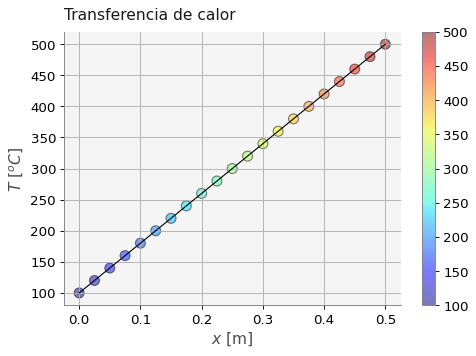

In [7]:
# Datos del problema
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelve(TA, TB, q, L, k, N)

# Definición del espacio de graficación
v = mvis.Plotter(1,1,[ejes_par])

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
v.plot(1, x, T, color='k', lw=1.0)
s = v.scatter(1, x, T, c=T, ec='black', s=80, vmin=100, vmax=500, cmap='jet', alpha=0.5)
v.colorbar(1, s) # Se muestra una barra de color 
v.grid()
v.show()

<div class="alert alert-success">

### Ejemplo 4.

Usaremos nuestra aproximación para resolver el problema del Ejemplo 2.

</div>

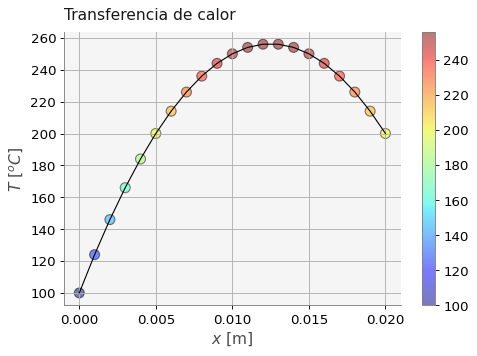

In [8]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelve(TA, TB, q, L, k, N)

# Definición del espacio de graficación
v = mvis.Plotter(1,1,[ejes_par])

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
v.plot(1, x, T, color='k', lw=1.0)
s = v.scatter(1, x, T, c=T, ec='black', s=80, cmap='jet', alpha=0.5)
v.colorbar(1, s) # Se muestra una barra de color 
v.grid()
v.show()

Observamos que en los dos ejemplos, las soluciones son similares a las obtenidas usando la solución analítica. Intente aumentar el número de puntos ($N$) de la aproximación y vea lo que sucede. Para evaluar la precisión del método, se propone al estudiante que calcule la norma del error entre solución analítica y la solución numérica.